## Introductory experiment: drawing cards from two stacks

- Imagine a game with **two big stacks of cards**
- Each stack contains **winning cards** and **blanks**.
- You have to decide **which stack has more wins**
- How often do you have to draw pairs of cards (one from each stack)?

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# setup
from cards_code import *
enable_slide_theme()

In [3]:
import_lato_font_in_notebook()

In [4]:
# create data for virtual experiments
p_win_1       = 0.5
p_win_2       = 0.4
n_card_pairs  = 100
n_repeats      = 50

df = repeated_experiments_df(
    p_win_1,
    p_win_2,
    n_card_pairs,
    n_repeats
)
df.head()

,experiment,stack,card_pair,win
0,1,1,1,1
1,1,1,2,1
2,1,1,3,0
3,1,1,4,0
4,1,1,5,1


In [5]:
# transparently export data if needed
# if you have issues viewing the plots, try embedding the data
# this will increase the file size!
data = df_to_datasource(df)

### Draw cards from two different stacks, one from each stack at a time
- What can we know after drawing a certain number of cards?
- When have we drawn enough cards to be certain?

The next three figures are interactive! Unfortunately they won't work on GitHub, in that case please keep on scrolling.

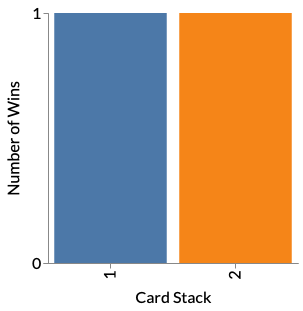

In [6]:
plot_first_experiment_bars(data=data, n_card_pairs=min(n_card_pairs, 40))

.

.

**Spoilers below!**

.

.

.

Scroll down when you are finished drawing cards

.

.

.

.

.

.

.

.

.

.

.

.

.



### It can take a while to see which stack is better!

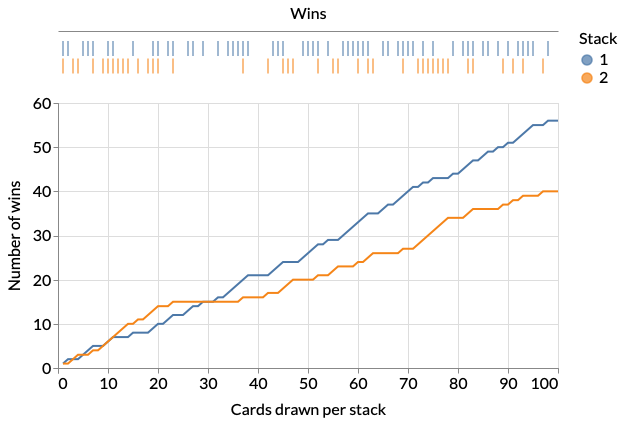

In [7]:
plot_first_experiment_lines(data=data)

### Repeat the experiment
- Draw a fixed number of from each stack
- Calculate each stack's winning probability = number of wins / number of cards
- Repeat 50 times

### Each repetition yields a different winning probability for each stack. 

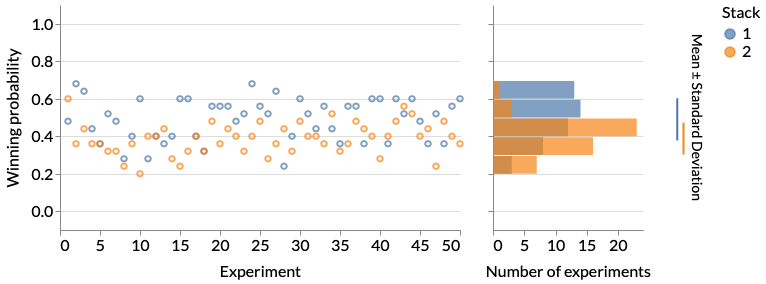

In [8]:
plot_repeated_experiments(data=data, n_card_pairs=n_card_pairs)

- A **histogram** quantifies how often we observed a certain outcome
- The **standard deviation (std.)** over the repetitions measures uncertainty
- It corresponds to the **standard error** of the mean for a single experiment.

### A single small experiment (25 cards)

- **Error bars** show the **standard error** of a single experiment
- Here they **overlap** - the difference betwen the stacks is smaller than the uncertainty
- **We can't decide** which stack is better $^{*▾}$

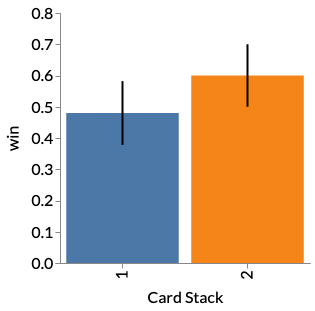

In [9]:
plot_experiment_bars_with_errors(data=data, n_card_pairs=n_card_pairs, n_card_pairs_init=25, n_repeats=n_repeats)

### Error bars commonly represent standard errors

- They show the uncertainty of the `mean` value of an observable
- They represent the range in which ~68% of the observations fall
- If they don't overlap, the corresponding `means` are different with ~97.5% probability
- Therefore, false positives can still occur. To lower their probability, we can require several standard errors of difference.
- Sometimes error bars can show other related measures, which should be noted near the figure
- They are only valid for "well behaved" distributions, which we will explain in a followup 

### An bigger experiment (100 cards)

- The **error bars don't overlap**
- We can say the difference is **statistically significant**
- We can be very certain that stack 1 has more wins

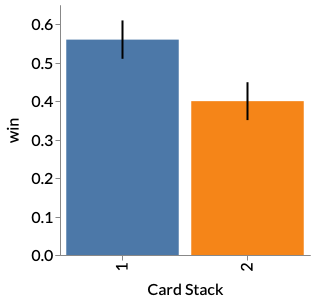

In [10]:
plot_experiment_bars_with_errors(data=data, n_card_pairs=n_card_pairs, n_card_pairs_init=100, n_repeats=n_repeats)

# How to calculate these quantities? 
See next section `practical basics`!

In [11]:
# export to slideshow AFTER saving the notebook
#! export CONVERT=TRUE; jupyter nbconvert --execute 1_cards.ipynb --output-dir='./slides' --to slides --no-input

In [12]:
# view the slides
#! python -m http.server --directory slides